In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, recall_score, precision_score, roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer

from scipy.stats import mstats


#Data Exploration

In [ ]:
url1 = 'https://raw.githubusercontent.com/dsahota-applied-data-analysis/project-report-tranx897/main/sephora_website_dataset.csv?token=GHSAT0AAAAAACARBDNH7HM75V53KMFYCUCGZDOIE6A'
sephora = pd.read_csv(url1)
sephora.shape
print('\n')
sephora.columns

(9168, 21)

Index(['id', 'brand', 'category', 'name', 'size', 'rating',
       'number_of_reviews', 'love', 'price', 'value_price', 'URL',
       'MarketingFlags', 'MarketingFlags_content', 'options', 'details',
       'how_to_use', 'ingredients', 'online_only', 'exclusive',
       'limited_edition', 'limited_time_offer'],
      dtype='object')

In [ ]:
sephora.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9168 entries, 0 to 9167
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      9168 non-null   int64  
 1   brand                   9168 non-null   object 
 2   category                9168 non-null   object 
 3   name                    9168 non-null   object 
 4   size                    9168 non-null   object 
 5   rating                  9168 non-null   float64
 6   number_of_reviews       9168 non-null   int64  
 7   love                    9168 non-null   int64  
 8   price                   9168 non-null   float64
 9   value_price             9168 non-null   float64
 10  URL                     9168 non-null   object 
 11  MarketingFlags          9168 non-null   bool   
 12  MarketingFlags_content  9168 non-null   object 
 13  options                 9168 non-null   object 
 14  details                 9168 non-null   

In [ ]:
#Find categorical variables
obj_sephora = sephora.select_dtypes(include='object')
obj_cols = obj_sephora.columns
obj_cols

Index(['brand', 'category', 'name', 'size', 'URL', 'MarketingFlags_content',
       'options', 'details', 'how_to_use', 'ingredients'],
      dtype='object')

In [ ]:
# Explore number of unique values for each categorical variables
def describe_object(df, col_name):
  print(f"\nCOLUMN: {col_name}")
  print(f"{sephora[col_name].nunique()} different values")

for col_name in obj_cols:
  describe_object(sephora, col_name)
  sephora[col_name].value_counts(dropna=False, normalize=True)
  print('\n')


COLUMN: brand
324 different values


SEPHORA COLLECTION    0.054101
CLINIQUE              0.025524
tarte                 0.018543
TOM FORD              0.017561
Dior                  0.015816
                        ...   
SHHHOWERCAP           0.000109
Taste Beauty          0.000109
bkr                   0.000109
Cocofloss             0.000109
DL.MD                 0.000109
Name: brand, Length: 324, dtype: float64




COLUMN: category
143 different values


Perfume                      0.072535
Moisturizers                 0.049193
Face Serums                  0.041885
Value & Gift Sets            0.041230
Face Wash & Cleansers        0.026942
                               ...   
Wellness                     0.000109
High Tech Tools              0.000109
Hair Styling & Treatments    0.000109
Curls & Coils                0.000109
Lid Shadow Brush             0.000109
Name: category, Length: 143, dtype: float64




COLUMN: name
9106 different values


Blush                                     0.000436
Lip Gloss                                 0.000327
Face Mask                                 0.000327
Lipstick                                  0.000327
The Foundation Brush                      0.000327
                                            ...   
Vitamin Nectar Antioxidant Face Mist      0.000109
Sugar Roll-on Deodorant Antiperspirant    0.000109
Sugar Lip Polish Exfoliator               0.000109
Rose Face Mask Mini                       0.000109
Happy Birthday Gift Card                  0.000109
Name: name, Length: 9106, dtype: float64




COLUMN: size
1623 different values


no size             0.344786
1.7 oz/ 50 mL       0.054974
1 oz/ 30 mL         0.041121
3.4 oz/ 100 mL      0.020506
0.5 oz/ 15 mL       0.019197
                      ...   
2 x 1g/ 0.035 oz    0.000109
0.078 oz/ 2.2 g     0.000109
5.2 oz/ 150 mL      0.000109
1.7 oz/50 g         0.000109
0.946 oz/ 28 mL     0.000109
Name: size, Length: 1623, dtype: float64




COLUMN: URL
9168 different values


https://www.sephora.com/product/blu-mediterraneo-minature-set-P443401?icid2=products grid:p443401                        0.000109
https://www.sephora.com/product/no-7-bonding-oil-P447376?icid2=products grid:p447376                                     0.000109
https://www.sephora.com/product/kinetin-rejuvenating-serum-P439426?icid2=products grid:p439426                           0.000109
https://www.sephora.com/product/vitamin-c-suncare-broad-spectrum-spf-30-sunscreen-P439428?icid2=products grid:p439428    0.000109
https://www.sephora.com/product/olaplex-hair-perfector-no-3-P428224?icid2=products grid:p428224                          0.000109
                                                                                                                           ...   
https://www.sephora.com/product/black-tea-age-delay-cream-P217512?icid2=products grid:p217512                            0.000109
https://www.sephora.com/product/sugar-strawberry-exfoliating-face-wash-mini-P448192?icid2=




COLUMN: MarketingFlags_content
10 different values


0                                                   0.522033
exclusive                                           0.184555
online only                                         0.166667
exclusive · online only                             0.034686
limited edition · exclusive                         0.032395
limited edition                                     0.025851
limited edition · online only                       0.020506
limited edition · exclusive · online only           0.012980
limited time offer                                  0.000218
limited time offer · limited edition · exclusive    0.000109
Name: MarketingFlags_content, dtype: float64




COLUMN: options
564 different values


no options                                                                                                                                               0.913722
 - 1.7 oz/ 50 mL Eau de Parfum Spray                                                                                                                     0.001745
 - 1.7 oz/ 50 mL Eau de Parfum Spray  - 3.4 oz/ 100 mL Eau de Parfum Spray                                                                               0.001527
 - 1.0 oz/ 30 mL  Spray - 3.4 oz/ 100 mL  Spray                                                                                                          0.001418
 - 0.33 oz/ 10 mL Eau de Parfum Spray                                                                                                                    0.001309
                                                                                                                                                           ...   
 - 1 oz Eau de Parfum Spray 




COLUMN: details
8839 different values


no details                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              




COLUMN: how_to_use
6497 different values


no instructions                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  0.171575
Suggested Usage:-Fragrance is intensified by the warmth of your own body. Apply in the creases of your knees and elbows for a longer-lasting- stronger scent. -After applying- avoid rubbing o




COLUMN: ingredients
6962 different values


unknown                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [ ]:
# Explore numerical variables
sephora_wo_id = sephora.drop('id', axis=1)
num_sephora = sephora_wo_id.select_dtypes(include='number')
num_sephora.describe()

,rating,number_of_reviews,love,price,value_price,online_only,exclusive,limited_edition,limited_time_offer,ounces,price_per_ounce,brand_rank
count,9168.000000,9168.000000,9.168000e+03,9168.000000,9168.00000,9168.000000,9168.000000,9168.000000,9168.000000,5717.000000,5717.000000,9168.000000
mean,3.990020,282.139180,1.627859e+04,50.063237,51.82359,0.234839,0.264725,0.091841,0.000327,2.721043,166.403527,87.041121
std,1.007707,890.642028,4.260651e+04,47.164989,49.45902,0.423921,0.441211,0.288817,0.018087,9.240177,836.089424,78.864910
min,0.000000,0.000000,0.000000e+00,2.000000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000800,0.232000,1.000000
25%,4.000000,10.000000,1.600000e+03,24.000000,25.00000,0.000000,0.000000,0.000000,0.000000,0.340000,11.176471,22.000000
50%,4.000000,46.000000,4.800000e+03,35.000000,35.00000,0.000000,0.000000,0.000000,0.000000,1.600000,42.424242,63.000000
75%,4.500000,210.000000,1.380000e+04,59.000000,60.00000,0.000000,1.000000,0.000000,0.000000,3.400000,102.941176,135.000000
max,5.000000,19000.000000,1.300000e+06,549.000000,549.00000,1.000000,1.000000,1.000000,1.000000,625.000000,28000.000000,324.000000


Text(0.5, 0, 'Number of Loves')

Text(0, 0.5, 'Rating')

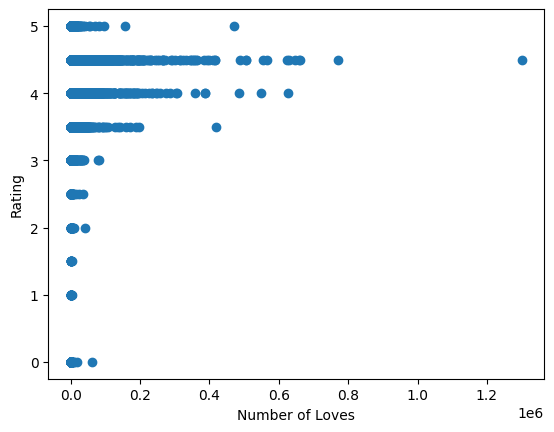

In [ ]:
# Visualize potential relationships between loves and rating
plt.scatter(x=sephora.love, y=sephora.rating)
plt.xlabel("Number of Loves")
plt.ylabel("Rating")
plt.show()

Text(0.5, 0, 'Number of Loves')

Text(0, 0.5, 'Price')

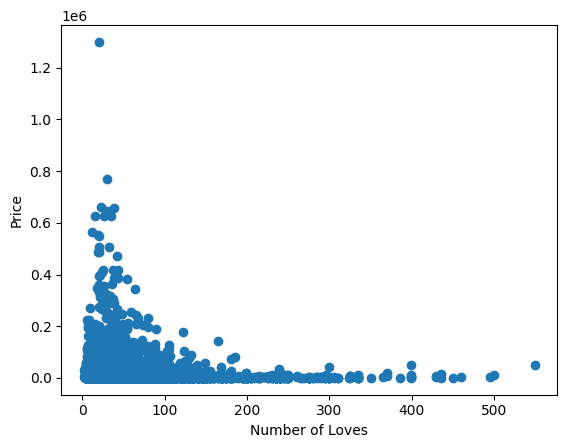

In [ ]:
# Visualize potential relationships between loves and price
plt.scatter(x=sephora.price, y=sephora.love)
plt.xlabel("Number of Loves")
plt.ylabel("Price")
plt.show()

#Data Preprocessing and Feature Engineering

Create new feature "love_class" to categorize number of loves:
*   High: products with # loves in top 20%
*   Medium: rest of products


In [ ]:
# Calculate the percentiles of the "love" values
threshold_med = np.percentile(sephora['love'], 80)
threshold_high = np.percentile(sephora['love'], 100)

# Function to map "love" values to corresponding classes
def get_love_class(love):
    if love < threshold_med:
        return 'Medium'
    else:
        return 'High'

# Add a new column "love_class" based on the "love" values
sephora['love_class'] = sephora['love'].apply(get_love_class)

Create new price_per_ounce feature

In [ ]:
# Extract number of ounces from the "size" feature
sephora['ounces'] = sephora['size'].str.extract(r'(\d+(?:\.\d+)?)\s*(?:fl\s*)?oz')
# Convert the 'ounces' column to numeric type
sephora['ounces'] = pd.to_numeric(sephora['ounces'])
# Create new column price_per_ounce
sephora['price_per_ounce'] = sephora['price'] / sephora['ounces']

Create feature brank_rank based on number of loves in the training data

In [ ]:
# Split the data into training and testing sets
train_df, test_df = train_test_split(sephora, test_size=0.3, random_state=1)
# Group by brands and sum the 'loves' for each brand
brand_love_counts = train_df.groupby('brand')['love'].sum().reset_index()
# Sort the brands based on 'loves' in descending order
brand_love_counts = brand_love_counts.sort_values('love', ascending=False)
# Assign ranks to the brands
brand_love_counts['brand_rank'] = pd.RangeIndex(start=1, stop=len(brand_love_counts) + 1)
# Merge the brand ranks back to the original DataFrame
sephora = pd.merge(sephora, brand_love_counts[['brand', 'brand_rank']], on='brand', how='left')

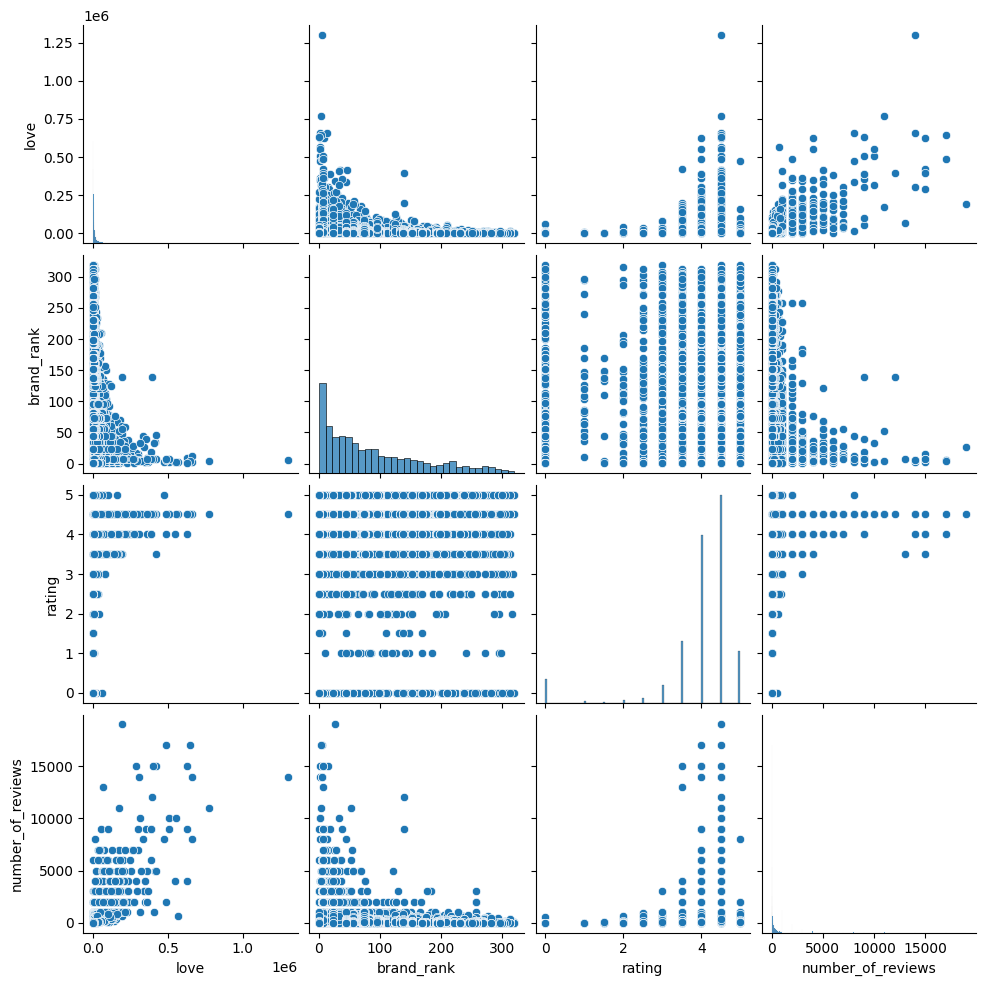

In [ ]:
# Visualize potential relationships 
sephora_subset = sephora[['love', 'brand_rank', 'rating', 'number_of_reviews']]
sns.pairplot(sephora_subset)


#Hypothesis 1: 'Love_class' can be predicted with brand_rank and category 

Logistic Regression model to predict love_class based on category and brand_rank

In [ ]:
# Drop rows where we don't have a brand_rank to use as feature
sephora_br = sephora.dropna(subset=['brand_rank'])

X = sephora_br[['brand_rank']]  # Features (brand_rank)
y = sephora_br['love_class']  # Target variable (love_class)

# Convert 'category' column into one-hot encoded representation
category_dummies = pd.get_dummies(sephora_br['category'])

# Concatenate the one-hot encoded 'category' columns with the other features
X = pd.concat([X, category_dummies], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create a logistic regression model
logreg = LogisticRegression()

# Train the model on the training data
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Define function eval_model to evaluate all classification models
def eval_model(model, X_train, X_test, y_train, y_test):
  # Predict the target variable for the training and testing data
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)
  
  # Calculate the evaluation metrics 
  metrics_train = {
      'Accuracy': accuracy_score(y_train, y_train_pred),
      'Precision': precision_score(y_train, y_train_pred, pos_label='High'),
      'Recall': recall_score(y_train, y_train_pred, pos_label='High'),
      'ROC AUC': roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])}

  metrics_test = {
      'Accuracy': accuracy_score(y_test, y_test_pred),
      'Precision': precision_score(y_test, y_test_pred, pos_label='High'),
      'Recall': recall_score(y_test, y_test_pred, pos_label='High'),
      'ROC AUC': roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])}   

  # Create a DataFrame to display the metrics
  metrics_df = pd.DataFrame({'Train': metrics_train, 'Test': metrics_test})
  print(metrics_df)

In [ ]:
eval_model(logreg, X_train, X_test, y_train, y_test)

              Train      Test
Accuracy   0.820081  0.807203
Precision  0.607321  0.546875
Recall     0.284489  0.252708
ROC AUC    0.825871  0.799641


k-NN model to predict love_class based on category and brand_rank 

In [ ]:
# Drop rows where we don't have a brand_rank to use as feature
sephora_br = sephora.dropna(subset=['brand_rank'])

X = sephora_br[['brand_rank']]  # Features (brand_rank)
y = sephora_br['love_class']  # Target variable (love_class)

# Convert 'category' column into one-hot encoded representation
category_dummies = pd.get_dummies(sephora_br['category'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create and fit the k-NN model
k = 5  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
eval_model(knn, X_train, X_test, y_train, y_test)

              Train      Test
Accuracy   0.804958  0.805748
Precision  0.525397  0.534722
Recall     0.257989  0.277978
ROC AUC    0.738529  0.715965


Random Forest model to predict love_class based on category and brand_rank

In [ ]:
# Drop rows where we don't have a brand_rank to use as feature
sephora_br = sephora.dropna(subset=['brand_rank'])

X = sephora_br[['brand_rank']]  # Features (brand_rank)
y = sephora_br['love_class']  # Target variable (love_class)

# Convert 'category' column into one-hot encoded representation
category_dummies = pd.get_dummies(sephora_br['category'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create a Random Forest classifier
rf = RandomForestClassifier()

# Train the model on the training data
rf.fit(X_train, y_train)

RandomForestClassifier()

Training Accuracy: 0.8261615216713439 
Test Accuracy: 0.8177519097853765


In [ ]:
eval_model(rf, X_train, X_test, y_train, y_test)

              Train      Test
Accuracy   0.826162  0.817752
Precision  0.640468  0.597786
Recall     0.298519  0.292419
ROC AUC    0.828448  0.793549


#Hypothesis 2: "Love_class" can be predicted by "ingredients"

We will try to vectorize the ingredients list and predict "love" based on the vectorized list of ingredients. CountVectorizer creates a matrix of word counts in the ingredient list

First we will need to create a list of valid ingredients as a dictionary for our vectorizer. Ingredients in the Ingredients column are in the form "Ingredient-" or "- ingredient-".

In [ ]:
# Create list of valid ingredients
import re

def extract_ingredient_words(data):
    ingredient_words = set()
    pattern = r"(?<!\S)([A-Za-z\s]+-|:[A-Za-z\s]+-|- [a-z\s]+-)(?!\S)"

    for row in data:
        # Find all matches of the pattern in the row
        row = row.replace("\n", " ")
        matches = re.findall(pattern, row)    
        # Iterate over the matches and add valid ingredient words to the set
        for match in matches:
            word = match.strip("-: \n")
            ingredient_words.add(word.lower())
    return list(ingredient_words)

ingredient_phrases = extract_ingredient_words(sephora['ingredients'])

In [ ]:
# Remove other non-ingredient phrases
phrases_to_remove = ['parfum fragrance', 'may contain', 'support', 'moisturize',
                     'delivers essential vitamins']
ingredient_phrases = [phrase for phrase in ingredient_phrases if phrase not in phrases_to_remove]

In [ ]:
ingredient_phrases

['',
 'goalz',
 'linolenic acid',
 'hydrogentaed vegetable oil',
 'vanillyl butyl ether',
 'beverly hills',
 'supports turnover for smoother',
 'helps to soothe',
 'silica dimethyl silyate',
 'provides a source of youthfulness',
 'hydrolyzed  soy  protein',
 'softens the hair',
 'citric acid\u2028gigartina stellata extract',
 'geranyl acetate',
 'natural vitality',
 'dipheptyl succinate',
 'lipo hydroxy acid',
 'rutin',
 'pisum sativum extract',
 'smilax aristolochiifolia root extract',
 'escape',
 'sodium hyaluronate powder',
 'acetylated lanolin alcohol',
 'seaside',
 'so before using',
 'starch octenylsuccinate',
 'musa sapientum flower extract',
 'potato extract ferment filtrate',
 'disodium stearoyl glutamate',
 'darkness',
 'keep out of reach of children',
 'organic ginger extract',
 'broccoli',
 'supports brain',
 'goji berries',
 'and prevents oil from oxidizing',
 'hesperetin laurate',
 'tuscan orris',
 'a combination of prunus extract',
 'lightly moisturize',
 'gloiopeltis fu

Decision Tree Model to predict love_class based on ingredients

In [ ]:
#Create list of stop words to ignore in vectorization
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Split the data into independent variable (X) and dependent variable (y)
X = sephora['ingredients']
y = sephora['love_class']

# Initialize the CountVectorizer with the valid words 
vectorizer = CountVectorizer(vocabulary=ingredient_phrases,ngram_range=(2,10),
                             stop_words=stop_words)

# Fit and transform the ingredient data
X_vectorized = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.3, random_state=1)

# Create an instance of DecisionTreeClassifier
ingredient_dec_tree = DecisionTreeClassifier()

# Fit the model using the training data
ingredient_dec_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
eval_model(ingredient_dec_tree, X_train, X_test, y_train, y_test)

              Train      Test
Accuracy   0.959015  0.743003
Precision  0.921601  0.357285
Recall     0.867347  0.317376
ROC AUC    0.983369  0.563724


We will analyze the most important ingredient features

In [ ]:
importances = ingredient_dec_tree.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]

# Get the corresponding feature names
feature_names = vectorizer.get_feature_names_out()

# Get the top 30 most important words
top_words = [feature_names[i] for i in sorted_indices[:20]]

print("Top 20 important ingredient words:")
for word in top_words:
    print(word)

Top 20 important ingredient words:
iron oxides
citric acid
titanium dioxide
sodium hyaluronate crosspolymer
sodium hydroxide
fruit extract
seed oil
butylene glycol
zinc stearate
calcium sodium
hexylene glycol
synthetic wax
echinacea purpurea root extract
disteardimonium hectorite
synthetic fluorphlogopite
bismuth oxychloride
acacia senegal
castor oil
alcohol denat
isomethyl ionone


Random Forest model to predict love_class based on ingredients

In [ ]:
# Split the data into independent variable (X) and dependent variable (y)
X = sephora['ingredients']
y = sephora['love_class']

# Initialize the CountVectorizer with the valid words 
vectorizer = CountVectorizer(vocabulary=ingredient_phrases,ngram_range=(2,10),
                             stop_words=stop_words)

# Fit and transform the ingredient data
X_vectorized = vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.3, random_state=1)

# Create a Random Forest classifier
ingredient_rf = RandomForestClassifier()

# Train the model on the training data
ingredient_rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
eval_model(ingredient_rf, X_train, X_test, y_train, y_test)

              Train      Test
Accuracy   0.958859  0.781897
Precision  0.973734  0.434307
Recall     0.814757  0.210993
ROC AUC    0.969469  0.690802


In [ ]:
# Get the feature importance
importances = ingredient_rf.feature_importances_

# Sort feature importances in descending order
sorted_indices = np.argsort(importances)[::-1]

# Get the corresponding feature names
feature_names = vectorizer.get_feature_names_out()

# Get the top 30 most important words
top_words = [feature_names[i] for i in sorted_indices[:20]]

print("Top 20 important ingredient words:")
for word in top_words:
    print(word)

Top 20 important ingredient words:
iron oxides
titanium dioxide
caprylyl glycol
seed oil
tin oxide
butylene glycol
synthetic fluorphlogopite
bismuth oxychloride
zinc stearate
disteardimonium hectorite
sodium dehydroacetate
propylene carbonate
tocopheryl acetate
alcohol denat
citric acid
manganese violet
potassium sorbate
leaf extract
ethylhexyl palmitate
benzyl alcohol


#Hypothesis 3: "Love" can be predicted with brand_rank and category

In [ ]:
# Drop rows where we don't have a brand_rank to use as feature
sephora_br = sephora.dropna(subset=['brand_rank'])

X = sephora_br[['brand_rank']]  # Features (brand_rank)
y = sephora_br['love']  # Target variable (love)

# Convert 'category' column into one-hot encoded representation
category_dummies = pd.get_dummies(sephora_br['category'])
X = pd.concat([X, category_dummies], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create a pipeline with PolynomialFeatures and LinearRegression
linreg = LinearRegression()

# Fit the model on the data
linreg.fit(X_train, y_train)

LinearRegression()

In [ ]:
def eval_model_reg(model, X_train, X_test, y_train, y_test):
  # Predict the target variable for the training and testing data
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)
  
  # Calculate the evaluation metrics 
  metrics_train = {
      'R2': r2_score(y_train, y_train_pred),
      'MSE': mean_squared_error(y_train, y_train_pred),
      'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred))}

  metrics_test = {
      'R2': r2_score(y_test, y_test_pred),
      'MSE': mean_squared_error(y_test, y_test_pred),
      'RMSE': np.sqrt(mean_squared_error(y_train, y_train_pred))}

  # Create a DataFrame to display the metrics
  metrics_df = pd.DataFrame({'Train': metrics_train, 'Test': metrics_test})
  # Format the values without exponential notation
  metrics_df['Train'] = metrics_df['Train'].apply(lambda x: np.format_float_positional(x, trim='-'))
  metrics_df['Test'] = metrics_df['Test'].apply(lambda x: np.format_float_positional(x, trim='-'))
  print(metrics_df)

In [ ]:
eval_model_reg(linreg, X_train, X_test, y_train, y_test)

                   Train                         Test
R2     0.132841545125149           -82247062700660670
MSE   1496433540.7406473  166679521351517580000000000
RMSE   38683.76327014536            38683.76327014536
